In [ ]:
import numpy as np
import matplotlib.pyplot as plt

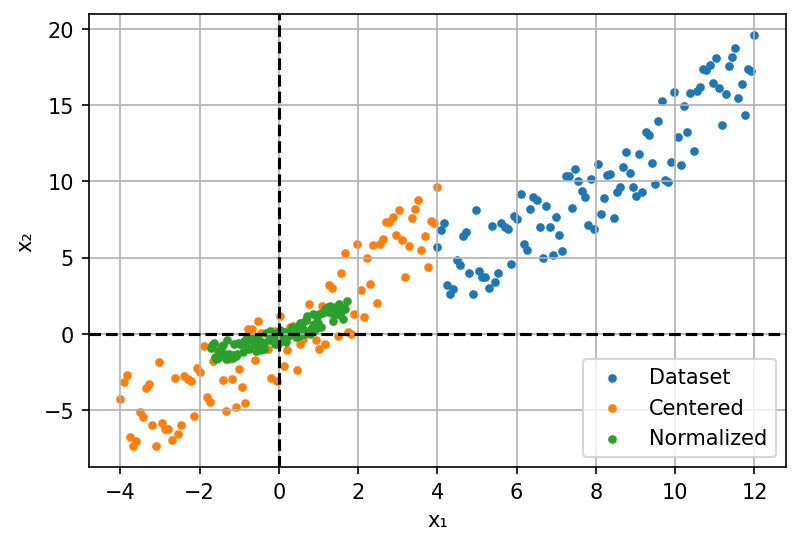

In [ ]:
# STANDARIZATION
plt.figure(dpi=150)

plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')

s = 10

x = np.linspace(4,12,100)
y = 0.1*x**2 + np.random.random(size=x.shape[0])*np.max(x)*0.5
plt.scatter(x,y, label="Dataset", s=s)
my = np.mean(y)
stdy = y.std()
mx = np.mean(x)
stdx = x.std()
#plt.scatter((x-mx),(y-my), label="Centered", s=s)
#plt.scatter((x-mx)/stdx,(y-my)/stdy,label="Normalized", s=s)

plt.legend()
plt.grid()
plt.xlabel(u'x\u2081')
plt.ylabel(u'x\u2082')
plt.savefig("Normalization.png")

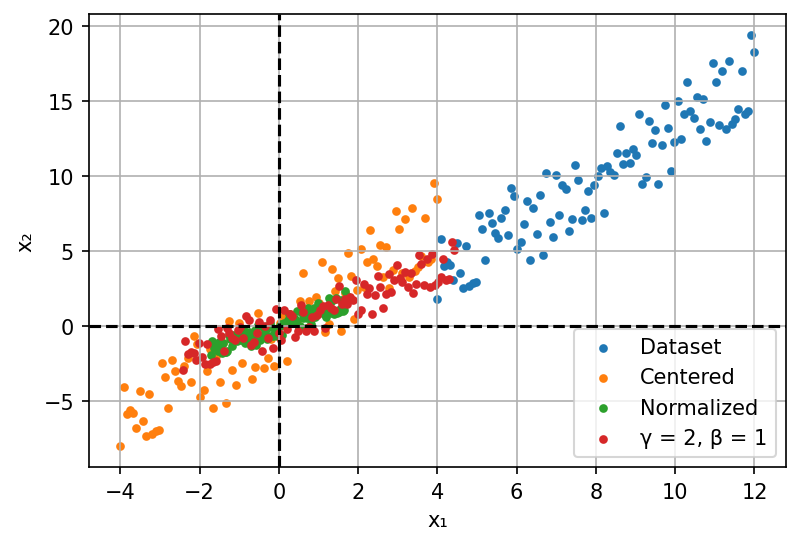

In [ ]:
# STANDARIZATION
plt.figure(dpi=150)

plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')

s = 10

x = np.linspace(4,12,100)
y = 0.1*x**2 + np.random.random(size=x.shape[0])*np.max(x)*0.5
plt.scatter(x,y, label="Dataset", s=s)
my = np.mean(y)
stdy = y.std()
mx = np.mean(x)
stdx = x.std()
plt.scatter((x-mx),(y-my), label="Centered", s=s)
plt.scatter((x-mx)/stdx,(y-my)/stdy,label="Normalized", s=s)
gamma = 2
beta = 1
bnx = gamma * (x-mx)/stdx + beta
bny = gamma * (y-my)/stdy + beta
plt.scatter(bnx,bny,label="γ = 2, β = 1", s=s)


plt.legend(loc='lower right')
plt.grid()
plt.xlabel(u'x\u2081')
plt.ylabel(u'x\u2082')
plt.savefig("BN.png")

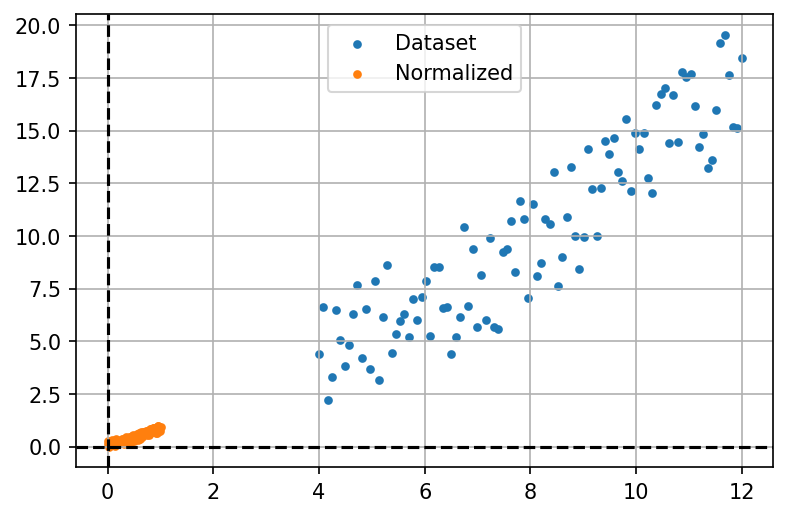

In [ ]:
# Normalize
plt.figure(dpi=150)

plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')

s = 10

x = np.linspace(4,12,100)
y = 0.1*x**2 + np.random.random(size=x.shape[0])*np.max(x)*0.5
plt.scatter(x,y, label="Dataset", s=s)

x_max, x_min = x.max(), x.min()
y_max, y_min = y.max(), y.min()

x = (x - x_min) / (x_max - x_min)
y = (y - y_min) / (y_max - y_min)

plt.scatter(x,y, label="Normalized", s=s)

plt.legend()
plt.grid()

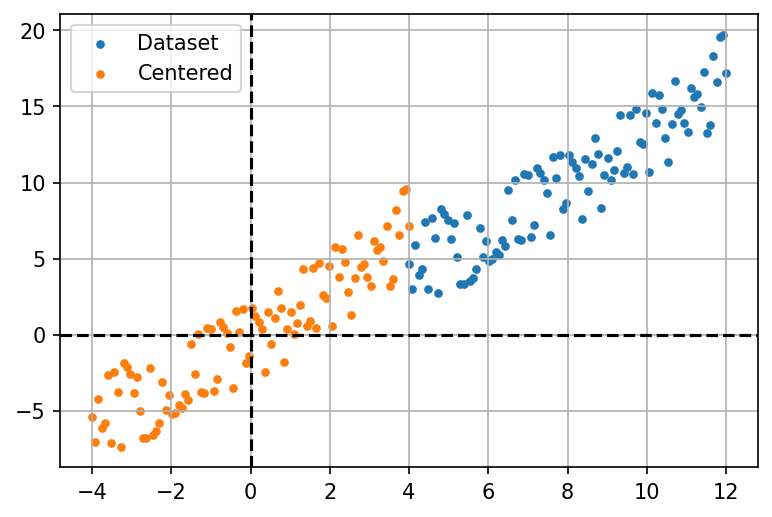

In [ ]:
# Centering
plt.figure(dpi=150)

plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')

s = 10

x = np.linspace(4,12,100)
y = 0.1*x**2 + np.random.random(size=x.shape[0])*np.max(x)*0.5
plt.scatter(x,y, label="Dataset", s=s)

x = x - x.mean()
y = y - y.mean()

plt.scatter(x,y, label="Centered", s=s)

plt.legend()
plt.grid()

In [2]:
import torch
x = torch.rand(6, 6, 3, 3)

In [3]:
def BatchNorm(x, gamma, beta, eps=1e-5):
    # x: input features with shape [N, C, H, W]
    # gamma, beta scale and offset with shape [N, 1, 1, 1]

    N, C, H, W = x.shape
    mean = torch.mean(input=x, dim=[1,2,3], keepdim=True)
    var = torch.var(input=x, dim=[1,2,3], keepdim=True)
    print(mean.shape, var.shape)
    
    x = (x - mean) / torch.sqrt(var + eps)

    gamma = torch.Tensor(N*[gamma]).view(N,1,1,1)
    beta = torch.Tensor(N*[beta]).view(N,1,1,1)
    
    return x * gamma + beta

BatchNorm(x, 2, 1).shape

torch.Size([6, 1, 1, 1]) torch.Size([6, 1, 1, 1])


torch.Size([6, 6, 3, 3])

In [4]:
def LayerNorm(x, gamma, beta, eps=1e-5):
    # x: input features with shape [N, C, H, W]
    # gamma, beta scale and offset [1, C, 1, 1]

    N, C, H, W = x.shape
    mean = torch.mean(input=x, dim=[0,2,3], keepdim=True)
    var = torch.var(input=x, dim=[0,2,3], keepdim=True)
    print(mean.shape, var.shape)
    
    x = (x - mean) / torch.sqrt(var + eps)

    gamma = torch.Tensor(C*[gamma]).view(1,C,1,1)
    beta = torch.Tensor(C*[beta]).view(1,C,1,1)
    
    return x * gamma + beta

LayerNorm(x, 2, 1).shape

torch.Size([1, 6, 1, 1]) torch.Size([1, 6, 1, 1])


torch.Size([6, 6, 3, 3])

In [ ]:
def InstanceNorm(x, gamma, beta, eps=1e-5):
    # x: input features with shape [N, C, H, W]
    # gamma, beta scale and offset [N, C, 1, 1]

    N, C, H, W = x.shape
    mean = torch.mean(input=x, dim=[2,3], keepdim=True)
    var = torch.var(input=x, dim=[2,3], keepdim=True)
    print(mean.shape, var.shape)
    
    x = (x - mean) / torch.sqrt(var + eps)

    gamma = torch.Tensor(N*C*[gamma]).view(N,C,1,1)
    beta = torch.Tensor(N*C*[beta]).view(N,C,1,1)
    
    return x * gamma + beta

InstanceNorm(x, 2, 1).shape

torch.Size([6, 6, 1, 1]) torch.Size([6, 6, 1, 1])


torch.Size([6, 6, 3, 3])

In [ ]:
def InstanceNorm(x, gamma, beta, G, eps=1e-5):
    # x: input features with shape [N, C, H, W]
    # gamma, beta scale and offset with shape [1, C, 1, 1]
    # G : number of groups

    N, C, H, W = x.shape
    x = torch.reshape(input=x, shape=[N, G, C // G, H, W])
    mean = torch.mean(input=x, dim=[2,3,4], keepdim=True)
    var = torch.var(input=x, dim=[2,3,4], keepdim=True)
    print(mean.shape, var.shape)
    
    x = (x - mean) / torch.sqrt(var + eps)

    x = torch.reshape(input=x, shape=[N, C, H, W])
    gamma = torch.Tensor(C*[gamma]).view(1,C,1,1)
    beta = torch.Tensor(C*[beta]).view(1,C,1,1)
    
    return x * gamma + beta

InstanceNorm(x, 2, 1, 2).shape

torch.Size([6, 2, 1, 1, 1]) torch.Size([6, 2, 1, 1, 1])


torch.Size([6, 6, 3, 3])